In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import cpnet
from graph_tool import spectral
import regression as reg

![](tabela.png)

In [17]:
model_data = pd.read_csv('model_data.csv')
model_data['FirstGameYear'] = model_data['FirstGameYear'].astype(int)
model_data.head()

,Unnamed: 0.1,Unnamed: 0,Publishers,Positive,Negative,TotalReviews,Price,AveragePlaytime,TotalGames,FirstGameYear,Degree,Betweenness,Closeness,Clustering,Coreness,Success,AverageReviews,PublisherSize,GamesSize
0,0,0,Valve,10882766,1243601,12126367,0.122942,0.114181,0.276423,1998,0.082881,0.000221,0.484974,0.713631,0.010891,0.897447,356657.852941,0.003880,0.014038
1,1,1,Ubisoft,2396991,473534,2870525,0.310507,0.034124,0.910569,2006,0.598761,0.000834,0.703159,0.785671,0.187561,0.835036,25629.687500,0.009648,0.010596
2,2,2,Electronic Arts,1768202,408321,2176523,0.419758,0.040712,0.682927,2008,0.637490,0.000892,0.722844,0.773622,0.222168,0.812398,25910.988095,0.011671,0.017089
3,3,3,Bethesda Softworks,1910954,257832,2168786,0.371287,0.035420,0.373984,2007,0.186677,0.000193,0.533692,0.785097,0.050339,0.881117,47147.521739,0.004918,0.013151
4,4,4,"KRAFTON, Inc.",1163353,902690,2066043,0.444407,0.216867,0.024390,2017,0.367157,0.000272,0.603553,0.838075,0.083979,0.563083,688681.000000,0.002351,0.096377


In [49]:
avg_reviews_cut = model_data['AverageReviews'].quantile(0.9) # Top 10%
year_cut = model_data['FirstGameYear'].quantile(0.9) # 10 % of the years

#total_reviews_cut 
avg_reviews_cut, year_cut

(11570.685185185192, 2019.0)

In [50]:
# Order by Publisher size
model_data.sort_values(by=['PublisherSize'], ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Publishers,Positive,Negative,TotalReviews,Price,AveragePlaytime,TotalGames,FirstGameYear,Degree,Betweenness,Closeness,Clustering,Coreness,Success,AverageReviews,PublisherSize,GamesSize
66,66,66,"KOEI TECMO GAMES CO., LTD.",132739,40124,172863,0.737626,0.066605,0.439024,2014,0.299768,0.000207,0.580225,0.861014,0.093901,0.767886,3201.166667,0.021569,0.049130
12,12,12,SEGA,759583,105902,865485,0.381533,0.048633,0.837398,2006,0.677769,0.000831,0.746674,0.759032,0.215150,0.877639,8402.766990,0.015538,0.018555
2,2,2,Electronic Arts,1768202,408321,2176523,0.419758,0.040712,0.682927,2008,0.637490,0.000892,0.722844,0.773622,0.222168,0.812398,25910.988095,0.011671,0.017089
11,11,11,Square Enix,761266,157731,918997,0.371318,0.027105,1.000000,1999,0.467080,0.000543,0.643249,0.809882,0.115198,0.828366,7471.520325,0.010065,0.010065
163,163,163,Slitherine Ltd.,36813,8096,44909,0.495438,0.047789,0.422764,2011,0.076685,0.001137,0.495585,0.824572,0.020329,0.819724,863.634615,0.010010,0.023676
1,1,1,Ubisoft,2396991,473534,2870525,0.310507,0.034124,0.910569,2006,0.598761,0.000834,0.703159,0.785671,0.187561,0.835036,25629.687500,0.009648,0.010596
16,16,16,BANDAI NAMCO Entertainment,605362,92019,697381,0.430099,0.037119,0.495935,2012,0.518978,0.000596,0.663753,0.802142,0.145450,0.868051,11432.475410,0.007917,0.015965
8,8,8,Paradox Interactive,973015,129774,1102789,0.291355,0.046481,0.495935,2009,0.357862,0.000419,0.596580,0.816050,0.074298,0.882322,18078.508197,0.006716,0.013542
23,23,23,Activision,461473,124151,585624,0.463664,0.037114,0.357724,2006,0.281177,0.003542,0.571239,0.751777,0.088577,0.788002,13309.636364,0.006156,0.017209
35,35,35,THQ Nordic,305125,69625,374750,0.309510,0.021803,0.853659,1997,0.669249,0.000657,0.741528,0.758554,0.215392,0.814209,3569.047619,0.005761,0.006748


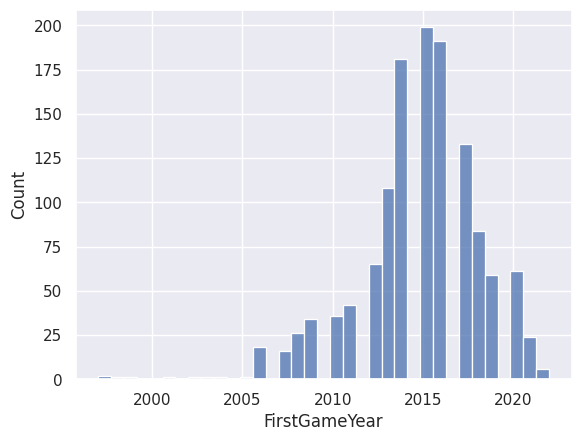

In [51]:
year_hist = sns.histplot(model_data['FirstGameYear'])

(0.0, 30000.0)

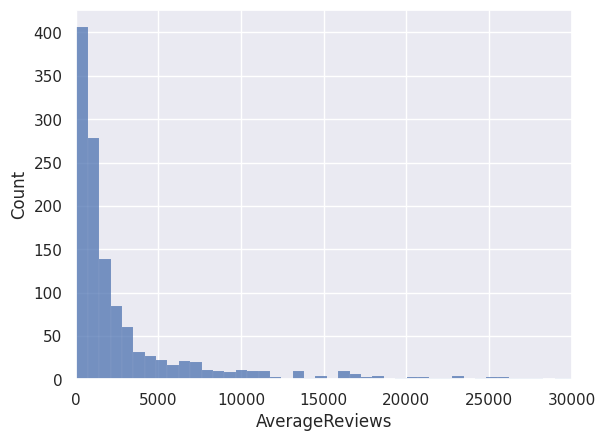

In [52]:
# sns hist average reviews
avg_hist = sns.histplot(model_data['AverageReviews'], bins=1000)
avg_hist.set_xlim([0, 30000])

### Somente análise para empresas gigantes X Somente análise para empresas novas

In [53]:
new_big_publishers = model_data[(model_data['FirstGameYear'] > year_cut) & (model_data['AverageReviews'] > avg_reviews_cut)]
result_new_big = reg.linear(data=new_big_publishers, formula='Success ~ Clustering + GamesSize')
#new_big_publishers

In [54]:
#result_new_big.summary()

In [55]:
result_new_big.micro_summary()

variable,coefficient,std error,p-value
Clustering,-0.158232,0.346272,0.678759
GamesSize,-4.298470,1.143354,0.032901


In [56]:
result_new_big.nano_summary()

-0.158 (0.346)
-4.298 (1.143) **


### Somente análise para empresas gigantes X Tudo exceto análise para empresas novas

In [57]:
old_big_publishers = model_data[(model_data['FirstGameYear'] < year_cut) & (model_data['AverageReviews'] > avg_reviews_cut)]
result_old_big = reg.linear(data=old_big_publishers, formula='Success ~ Clustering + GamesSize')

In [58]:
#result_old_big.summary()

In [59]:
result_old_big.micro_summary()

variable,coefficient,std error,p-value
Clustering,-0.210443,0.123302,0.090504
GamesSize,-0.612389,0.572890,0.287275


In [60]:
result_old_big.nano_summary()

-0.210 (0.123) *
-0.612 (0.573)


### Somente análise para empresas gigantes X Tudo

In [61]:
big_publishers = model_data[model_data['AverageReviews'] > avg_reviews_cut]
result_big = reg.linear(data=big_publishers, formula='Success ~ Clustering + GamesSize')

In [62]:
# result_big.summary()

In [63]:
result_big.nano_summary()

-0.157 (0.117)
-0.849 (0.553)


### Tudo exceto análise para empresas gigantes X Somente análise para empresas novas

In [64]:
new_small_publishers = model_data[(model_data['FirstGameYear'] > year_cut) & (model_data['AverageReviews'] < avg_reviews_cut)]
result_new_small = reg.linear(data=new_small_publishers, formula='Success ~ Clustering + GamesSize')

In [65]:
#result_new_small.summary()

In [66]:
result_new_small.micro_summary()

variable,coefficient,std error,p-value
Clustering,0.237629,0.133502,0.078786
GamesSize,3.910036,2.303623,0.093425


In [67]:
result_new_small.nano_summary()

+0.238 (0.134) *
+3.910 (2.304) *


### Tudo exceto análise para empresas gigantes X Tudo exceto análise para empresas novas

In [68]:
old_small_publishers = model_data[(model_data['FirstGameYear'] < year_cut) & (model_data['AverageReviews'] < avg_reviews_cut)]
result_old_small = reg.linear(data=old_small_publishers, formula='Success ~ Clustering + GamesSize')

In [69]:
#result_old_small.summary()

In [70]:
result_old_small.micro_summary()

variable,coefficient,std error,p-value
Clustering,0.179537,0.044665,0.000063
GamesSize,1.251472,0.519805,0.016236


In [71]:
result_old_small.nano_summary()

+0.180 (0.045) ***
+1.251 (0.520) **


### Tudo exceto análise para empresas gigantes X Tudo

In [72]:
small_publishers = model_data[model_data['AverageReviews'] < avg_reviews_cut]
result_small = reg.linear(data=small_publishers, formula='Success ~ Clustering + GamesSize')

In [73]:
#result_small.summary()

In [74]:
result_small.micro_summary()

variable,coefficient,std error,p-value
Clustering,0.179184,0.041607,0.000018
GamesSize,1.118936,0.484942,0.021210


In [75]:
result_small.nano_summary()

+0.179 (0.042) ***
+1.119 (0.485) **


### Tudo X Somente análise para empresas novas

In [76]:
new_publishers = model_data[model_data['FirstGameYear'] > year_cut]
result_new = reg.linear(data=new_publishers, formula='Success ~ Clustering + GamesSize')

In [77]:
result_new.micro_summary()

variable,coefficient,std error,p-value
Clustering,0.174243,0.131104,0.187270
GamesSize,-0.616420,1.343003,0.647376


In [78]:
result_new.nano_summary()

+0.174 (0.131)
-0.616 (1.343)


In [79]:
#result_new.plot_residuals()

### Tudo X Tudo exceto análise para empresas novas

In [80]:
old_publishers = model_data[model_data['FirstGameYear'] < year_cut]
result_old = reg.linear(data=old_publishers, formula='Success ~ Clustering + GamesSize')

In [81]:
#result_old.summary()

In [82]:
result_old.micro_summary()

variable,coefficient,std error,p-value
Clustering,0.149096,0.042395,0.000454
GamesSize,1.143140,0.390446,0.003482


In [83]:
result_old.nano_summary()

+0.149 (0.042) ***
+1.143 (0.390) ***
